USING KERAS AND TENSORFLOW FOR MACHINE LEARNING PREDICTIONS

In [35]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#normalising the data by scaling it for the  neuron network to easily learn
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

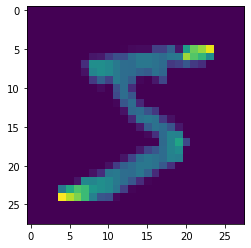

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(x_train[0])
plt.show()

In [22]:
#building the model itself
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())#input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))#output layer with 10 numbers of classification

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2547 - accuracy: 0.9260
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1030 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0703 - accuracy: 0.9777


In [23]:
#calculate validation loss
val_loss, val_acc = model.evaluate(x_test, y_test)
print (val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0938 - accuracy: 0.9721
0.09380077570676804 0.972100019454956


In [24]:
#saving the model
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [26]:
#reloading the model
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [27]:
#making a prediction
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[1.4786039e-09 6.0015736e-08 4.0558634e-06 ... 9.9987710e-01
  1.0539922e-07 1.5762499e-06]
 [2.7095601e-09 5.1196621e-05 9.9994755e-01 ... 8.5037808e-09
  2.4589237e-08 5.4151704e-11]
 [1.5813632e-07 9.9985754e-01 1.0321675e-05 ... 7.8889425e-05
  2.6886453e-05 2.6572354e-07]
 ...
 [2.0892502e-10 1.1227308e-08 1.9148989e-09 ... 4.4528529e-06
  3.3583831e-06 4.3939912e-05]
 [2.3456050e-06 9.1908710e-08 1.0367491e-07 ... 2.1683973e-06
  3.0931962e-05 3.3276212e-08]
 [4.1827010e-07 2.3558352e-08 9.8862301e-07 ... 3.9314557e-10
  7.3962184e-08 2.1910121e-10]]


In [29]:
import numpy as np
print(np.argmax(predictions[0]))

7


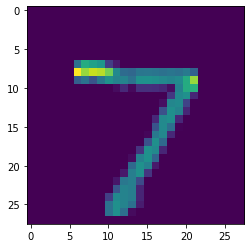

In [30]:
plt.imshow(x_test[0])
plt.show()

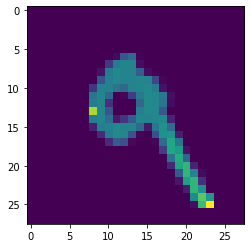

In [34]:
plt.imshow(x_test[7])
plt.show()